In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from google.colab import files

In [3]:
df = pd.read_csv("diabetes_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30


In [4]:
df.drop(columns=["encounter_id","patient_nbr"], inplace=True)

In [5]:
# checking variable types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98053 entries, 0 to 98052
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98053 non-null  object
 1   gender                    98053 non-null  object
 2   age                       98053 non-null  object
 3   admission_type_id         98053 non-null  int64 
 4   discharge_disposition_id  98053 non-null  int64 
 5   admission_source_id       98053 non-null  int64 
 6   time_in_hospital          98053 non-null  int64 
 7   num_lab_procedures        98053 non-null  int64 
 8   num_procedures            98053 non-null  int64 
 9   num_medications           98053 non-null  int64 
 10  number_outpatient         98053 non-null  int64 
 11  number_emergency          98053 non-null  int64 
 12  number_inpatient          98053 non-null  int64 
 13  diag_1                    98053 non-null  object
 14  diag_2                

In [6]:
# summary statisics
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000,98053.000000
mean,2.025813,3.753368,5.776692,4.421976,43.148073,1.350749,16.119650,0.376378,0.202462,0.646864,7.512060
std,1.450117,5.309392,4.071640,2.993074,19.712033,1.708506,8.108476,1.283359,0.942892,1.271020,1.832497
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


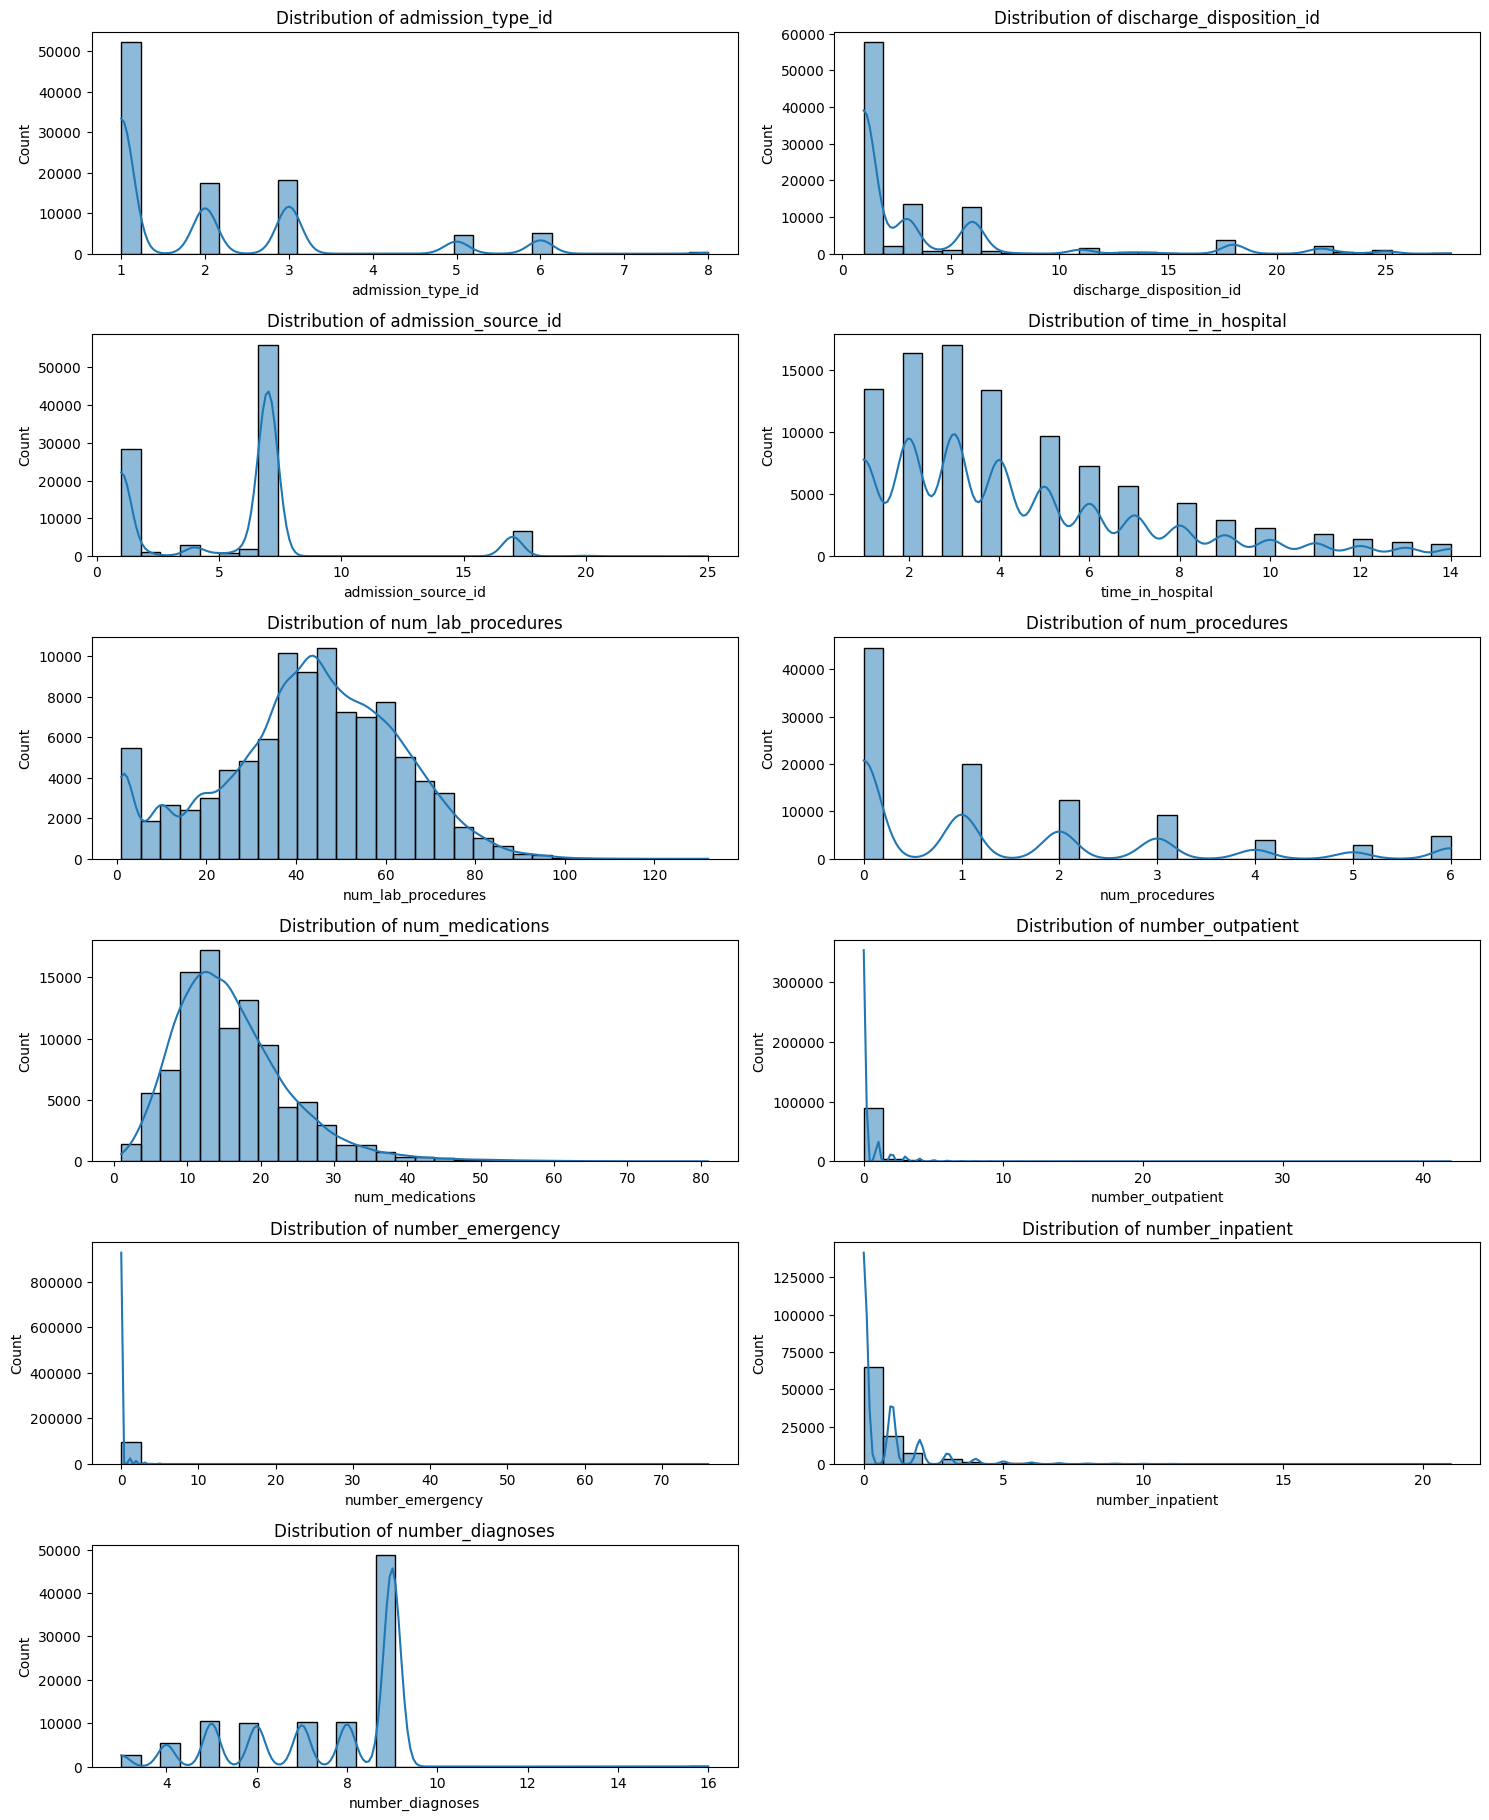

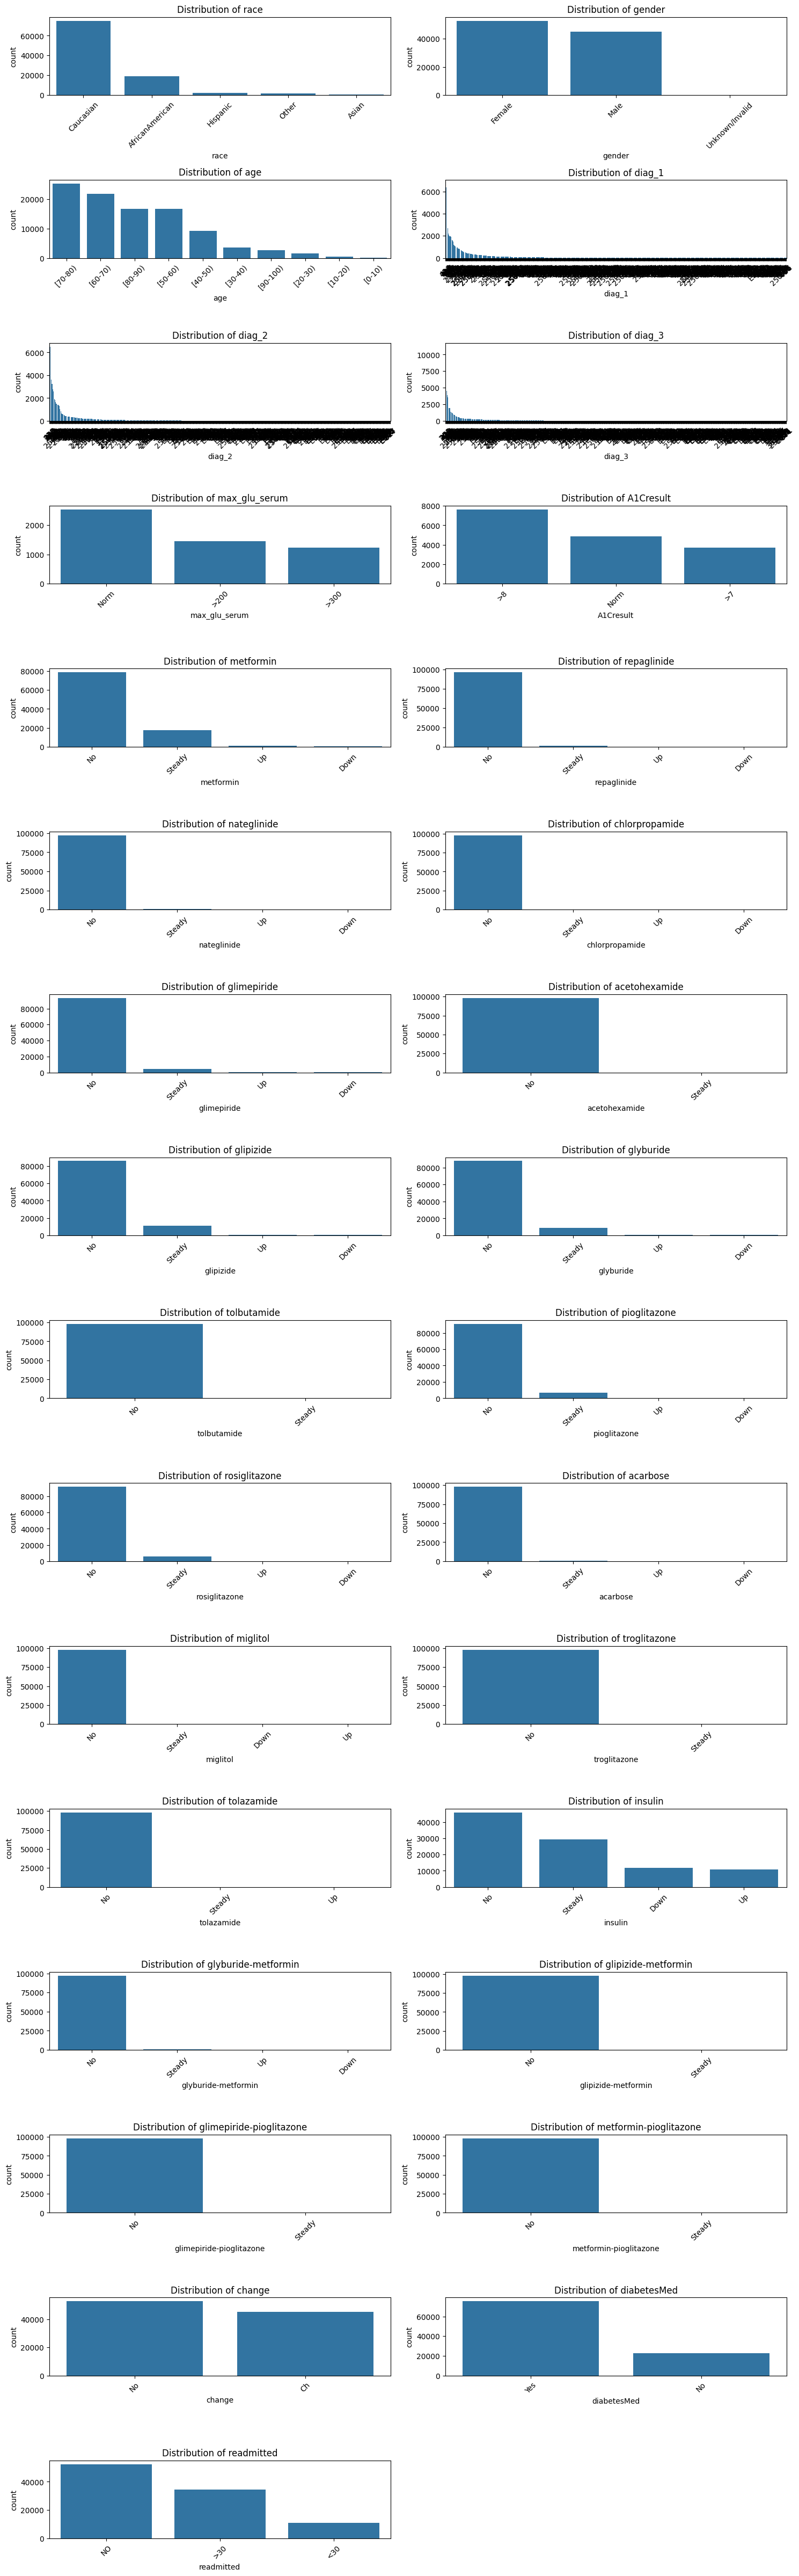

In [7]:
# defining numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# plot numerical variable distributions
plt.figure(figsize=(15, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# plot categorical variable distributions
plt.figure(figsize=(15, len(categorical_cols) * 3))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

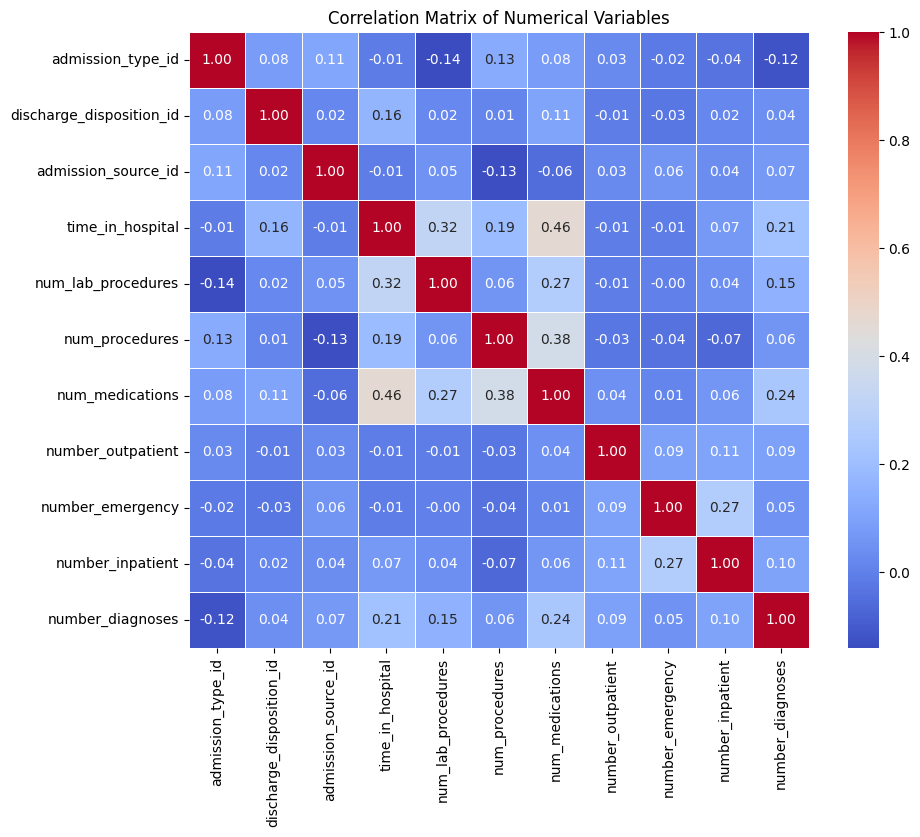

In [8]:
# computing the correlation matrix
corr_matrix = df[numerical_cols].corr()

# plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [9]:
print(df.columns)

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Step 2: Encode Target Variable ("readmitted") ###
# Mapping: "NO" -> 0, "<30" -> 1, ">30" -> 2
df['readmitted'] = df['readmitted'].map({"NO": 0, "<30": 1, ">30": 2})

### Step 3: Handle Categorical Variables ###
# Define columns for different encoding types
one_hot_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
ordinal_cols = ['max_glu_serum', 'A1Cresult', 'age']
binary_cols = ['change', 'diabetesMed']
medication_cols = ["insulin", "tolazamide", "metformin", "glipizide", "glyburide",
                   "pioglitazone", "rosiglitazone", "miglitol", "troglitazone",
                   "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone",
                   "metformin-pioglitazone", "repaglinide", "nateglinide", "chlorpropamide",
                   "glimepiride", "acetohexamide", "tolbutamide", "acarbose"]

### Step 4: One-Hot Encode Nominal Categorical Variables ###
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [11]:
### Step 5: Ordinal Encoding (For Ordered Categories) ###
# Define mappings
ordinal_mapping = {
    'max_glu_serum': {'None': 0, 'Norm': 1, '>200': 2, '>300': 3},
    'A1Cresult': {'None': 0, 'Norm': 1, '>7': 2, '>8': 3},
    'age': {'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7}
}
for col, mapping in ordinal_mapping.items():
    df[col] = df[col].map(mapping)

### Step 6: Binary Encoding (Yes/No Variables) ###
df['change'] = df['change'].map({"No": 0, "Ch": 1})
df['diabetesMed'] = df['diabetesMed'].map({"No": 0, "Yes": 1})

### Step 7: Ordinal Encoding for Medication Variables ###
# Encoding: "No" -> 0, "Steady" -> 1, "Up" -> 2, "Down" -> 3
medication_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}
for col in medication_cols:
    df[col] = df[col].map(medication_mapping)

### Step 8: Handle Diagnosis Codes (diag_1, diag_2, diag_3) ###
# Convert them to string and use Label Encoding
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [12]:
df.fillna(df.median(), inplace=True)

In [13]:
# Define features and target variable
X = df.drop(columns=["readmitted"])  # Replace with actual feature columns
y = df["readmitted"]  # Replace with actual response column

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Join train and test data sets
df_train = pd.concat([X_train, y_train], axis=1)  # Combine X_train and y_train
df_test = pd.concat([X_test, y_test], axis=1)  # Combine X_test and y_test

# Save DataFrame to CSV
df_train.to_csv('diabetes_train.csv', index=False)
df_test.to_csv('diabetes_test.csv', index=False)

# Download the CSV file
files.download('diabetes_train.csv')
files.download('diabetes_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, depths):
    best_model = None
    best_train_acc = 0
    best_test_acc = 0
    best_depth = None
    min_accuracy_drop = np.inf

    for depth in depths:
        model.set_params(max_depth=depth)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        accuracy_drop = train_acc - test_acc

        if accuracy_drop < min_accuracy_drop:
            min_accuracy_drop = accuracy_drop
            best_train_acc = train_acc
            best_test_acc = test_acc
            best_model = model
            best_depth = depth

    return best_model, best_depth, best_train_acc, best_test_acc

In [ ]:
# Define different depths to test
depths = [3, 5, 10, None]

# Train Decision Tree
print("Training Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42)
best_dt, dt_depth, dt_train_acc, dt_test_acc = train_and_evaluate(dt_model, X_train, y_train, X_test, y_test, depths)

print(f"Best Decision Tree Model (Max Depth: {dt_depth})")
print("Train Accuracy:", dt_train_acc)
print("Test Accuracy:", dt_test_acc)
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, best_dt.predict(X_test)))

In [15]:
def train_model(model, max_depth=None):
    """Train a given model with specified max_depth and return its accuracy."""
    if isinstance(model, DecisionTreeClassifier):
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    elif isinstance(model, RandomForestClassifier):
        model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    elif isinstance(model, GradientBoostingClassifier):
        model = GradientBoostingClassifier(n_estimators=100, max_depth=max_depth, random_state=42)

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    return model, train_acc, test_acc

# Define different depths to test
depths = [3, 5, 10, None]  # None means full depth

# Models to train
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest (Bagging)": RandomForestClassifier(),
    "Gradient Boosting (Boosting)": GradientBoostingClassifier(),
}

IndexError: list index out of range

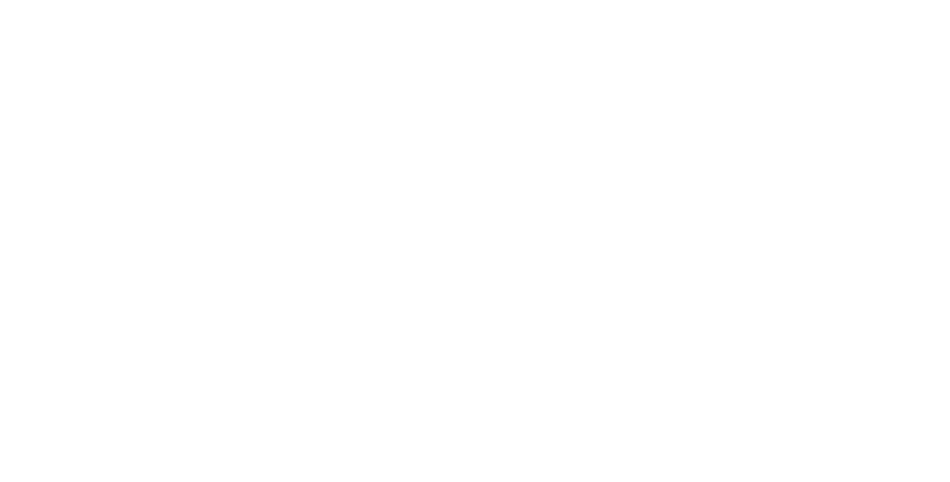

In [16]:
# Train models with different depths
results = []
for model_name, base_model in models.items():
    for depth in depths:
        model, train_acc, test_acc = train_model(base_model, depth)
        results.append((model_name, depth, train_acc, test_acc, model))

# Select best model for each method
best_models = {}
for model_name in models.keys():
    best_model = sorted(
        [r for r in results if r[0] == model_name],
        key=lambda x: x[2] - x[3]  # Minimize accuracy drop
    )[0]
    best_models[model_name] = best_model

# Plot the best decision tree
best_tree = best_models["Decision Tree"][-1]
plt.figure(figsize=(12, 6))
plot_tree(best_tree, feature_names=X.columns, class_names=["Not Readmitted", "Readmitted"], filled=True)
plt.show()


In [ ]:
# Function to train and evaluate models with different depths
def train_model(model, max_depth=None):
    """Train a given model with specified max_depth and return its accuracy."""
    if isinstance(model, DecisionTreeClassifier):
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    elif isinstance(model, RandomForestClassifier):
        model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    elif isinstance(model, AdaBoostClassifier):
        model = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=max_depth, random_state=42),
            n_estimators=100,
            random_state=42,
        )
    elif isinstance(model, GradientBoostingClassifier):
        model = GradientBoostingClassifier(n_estimators=100, max_depth=max_depth, random_state=42)

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    return model, train_acc, test_acc

In [ ]:
# Define different depths to test
depths = [3, 5, 10, None]  # None means full depth

# Models to train
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest (Bagging)": RandomForestClassifier(),
    "Gradient Boosting (Boosting)": GradientBoostingClassifier(),
}

# Train models with different depths
results = []
for model_name, base_model in models.items():
    for depth in depths:
        model, train_acc, test_acc = train_model(base_model, depth)
        results.append((model_name, depth, train_acc, test_acc, model))


KeyboardInterrupt: 

In [ ]:
# Plot the best decision tree
best_tree = best_models["Decision Tree"][-1]
plt.figure(figsize=(12, 6))
plot_tree(best_tree, feature_names=X.columns, class_names=["Not Readmitted", "Readmitted"], filled=True)
plt.show()

# Print confusion matrices
for model_name, (name, depth, train_acc, test_acc, model) in best_models.items():
    print(f"Best {model_name} Model (Max Depth: {depth})")
    print("Train Accuracy:", train_acc)
    print("Test Accuracy:", test_acc)
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, model.predict(X_test)))
    print("=" * 50)

In [ ]:
# Train SVM with hyperparameter tuning
svm = SVC(kernel="linear")
svm_params = {"C": [0.01, 0.1, 1, 10, 100]}
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring="accuracy")
svm_grid.fit(X_train, y_train)

# Train LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluate all models
final_models = {
    **{name: model[-1] for name, model in best_models.items()},  # Best tree, RF, AdaBoost, GB models
    "SVM": svm_grid.best_estimator_,
    "LDA": lda
}

In [ ]:
print("\nFinal Model Comparison:")
for name, model in final_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))